In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='nqa-ZlN0bdY9bW3696TDxLTRhOUe82GK3G-yc4u_JS3w',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'magneticresistance-donotdelete-pr-sniq6oybknxrok'
object_key = 'pmsm_temperature_data.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()


,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding,profile_id
0,-0.752143,-1.118446,0.327935,-1.297858,-1.222428,-0.250182,1.029572,-0.245860,-2.522071,-1.831422,-2.066143,-2.018033,4
1,-0.771263,-1.117021,0.329665,-1.297686,-1.222429,-0.249133,1.029509,-0.245832,-2.522418,-1.830969,-2.064859,-2.017631,4
2,-0.782892,-1.116681,0.332771,-1.301822,-1.222428,-0.249431,1.029448,-0.245818,-2.522673,-1.830400,-2.064073,-2.017343,4
3,-0.780935,-1.116764,0.333700,-1.301852,-1.222430,-0.248636,1.032845,-0.246955,-2.521639,-1.830333,-2.063137,-2.017632,4
4,-0.774043,-1.116775,0.335206,-1.303118,-1.222429,-0.248701,1.031807,-0.246610,-2.521900,-1.830498,-2.062795,-2.018145,4


In [3]:
sample_size = 10000 # or any other number you want to use as the sample size
df = df.sample(n=sample_size, random_state=0)

In [4]:
df_test = df[(df['profile_id'] == 65) | (df['profile_id'] == 72)]
df = df[(df['profile_id'] != 65) & (df['profile_id'] != 72)]

<AxesSubplot:>

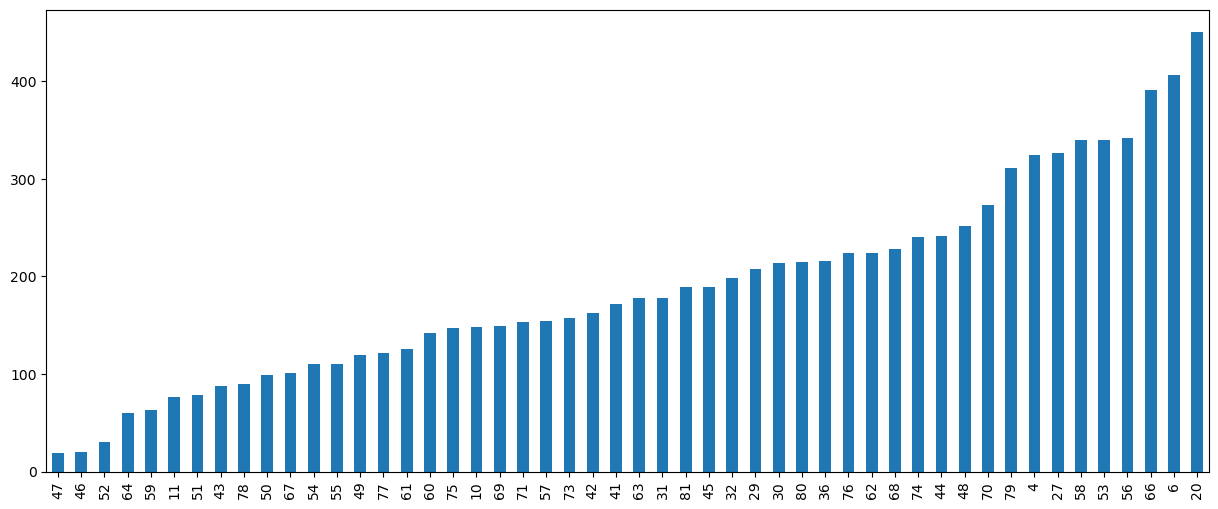

In [5]:
plt.figure(figsize=(15,6))
df['profile_id'].value_counts().sort_values().plot(kind = 'bar')

In [6]:
df.columns

Index(['ambient', 'coolant', 'u_d', 'u_q', 'motor_speed', 'torque', 'i_d',
       'i_q', 'pm', 'stator_yoke', 'stator_tooth', 'stator_winding',
       'profile_id'],
      dtype='object')

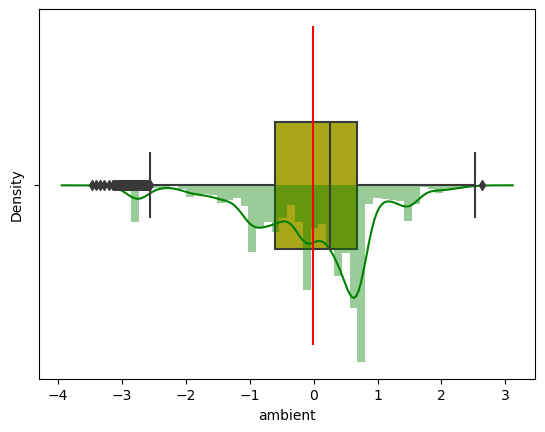

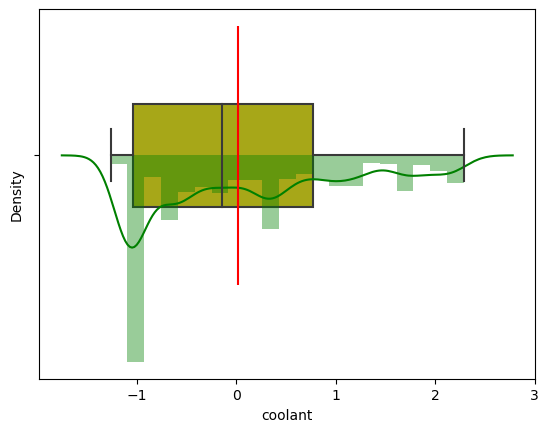

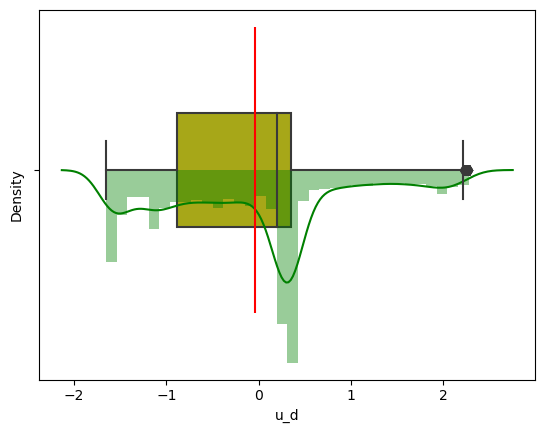

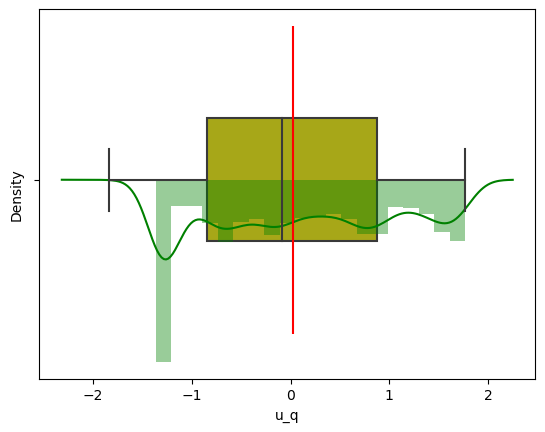

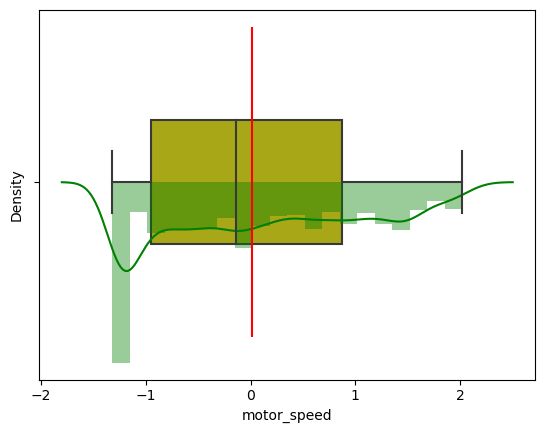

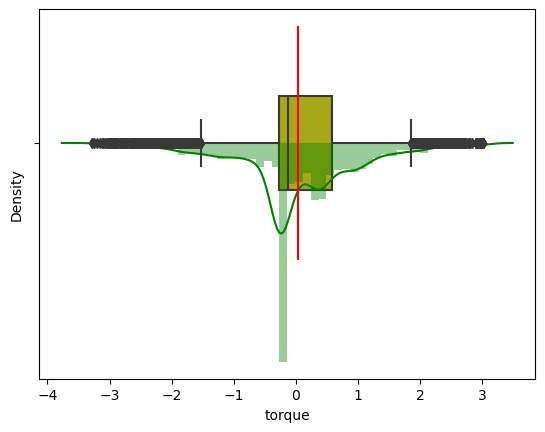

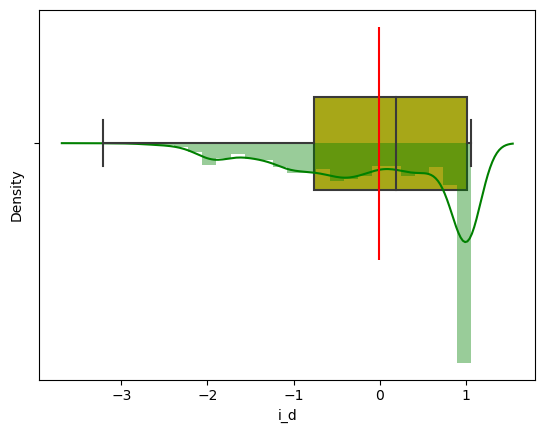

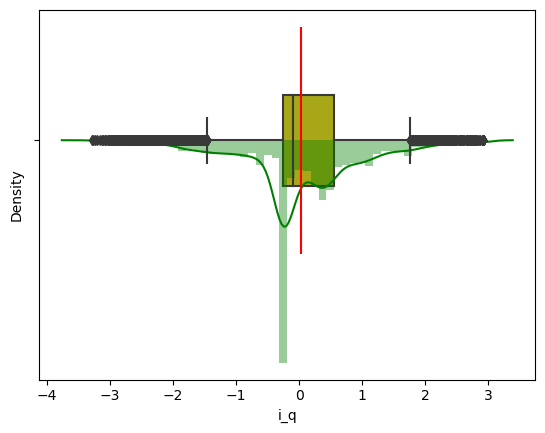

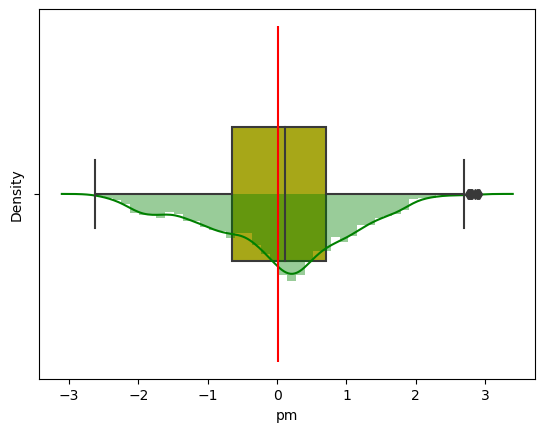

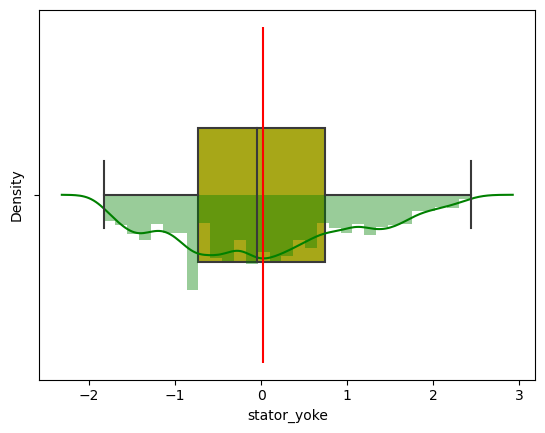

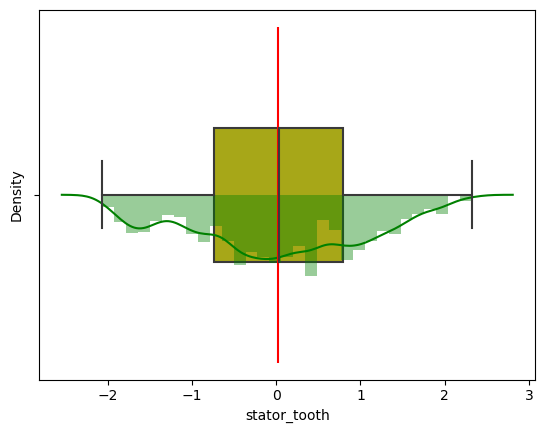

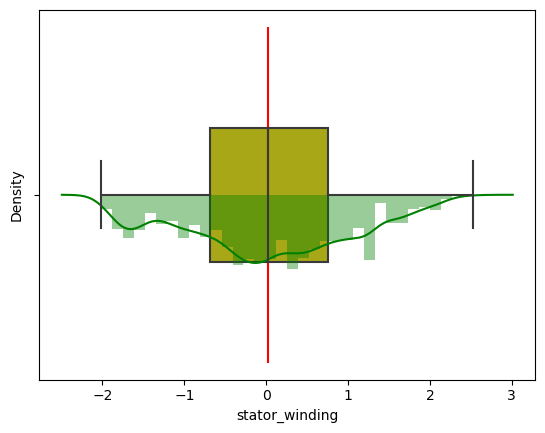

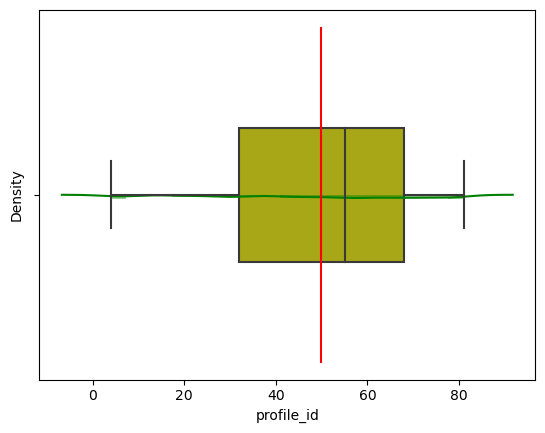

In [7]:
for i in df.columns:
    sns.distplot(df[i],color='g')
    sns.boxplot(df[i],color = 'y')
    plt.vlines(df[i].mean(),ymin = -1,ymax = 1,color = 'r')#drawing the mean line
    plt.show()

<AxesSubplot:xlabel='i_q', ylabel='pm'>

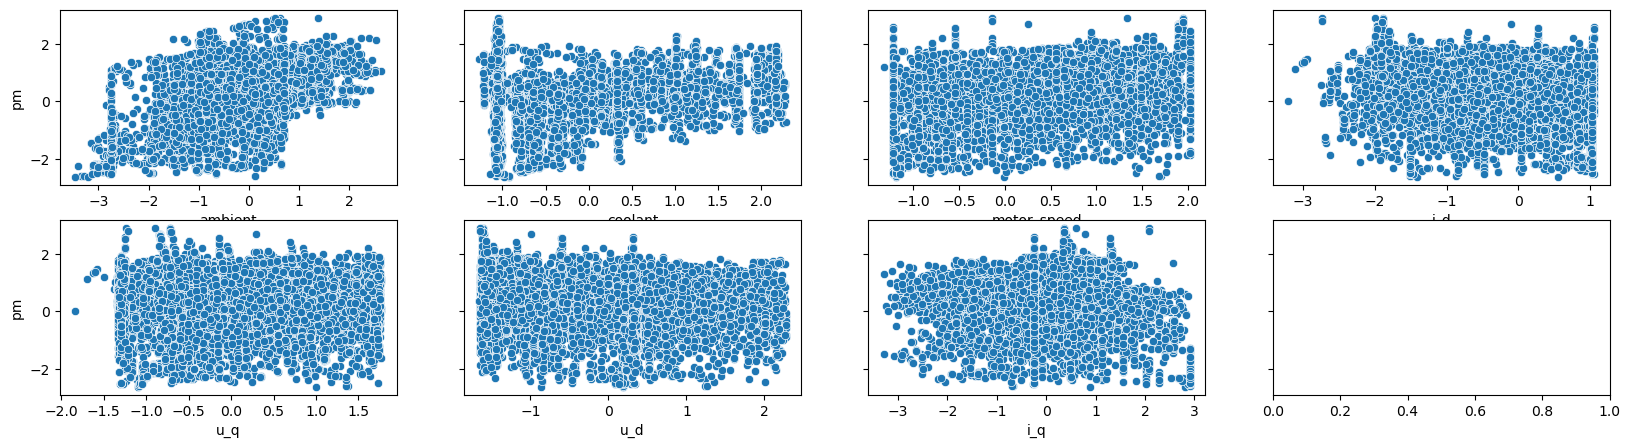

In [8]:
fig, axes = plt.subplots(2, 4, figsize=(20, 5),sharey=True)
sns.scatterplot(df['ambient'],df['pm'],ax=axes[0][0])
sns.scatterplot(df['coolant'],df['pm'],ax=axes[0][1])
sns.scatterplot(df['motor_speed'],df['pm'],ax=axes[0][2])
sns.scatterplot(df['i_d'],df['pm'],ax=axes[0][3])
sns.scatterplot(df['u_q'],df['pm'],ax=axes[1][0])
sns.scatterplot(df['u_d'],df['pm'],ax=axes[1][1])
sns.scatterplot(df['i_q'],df['pm'],ax=axes[1][2])

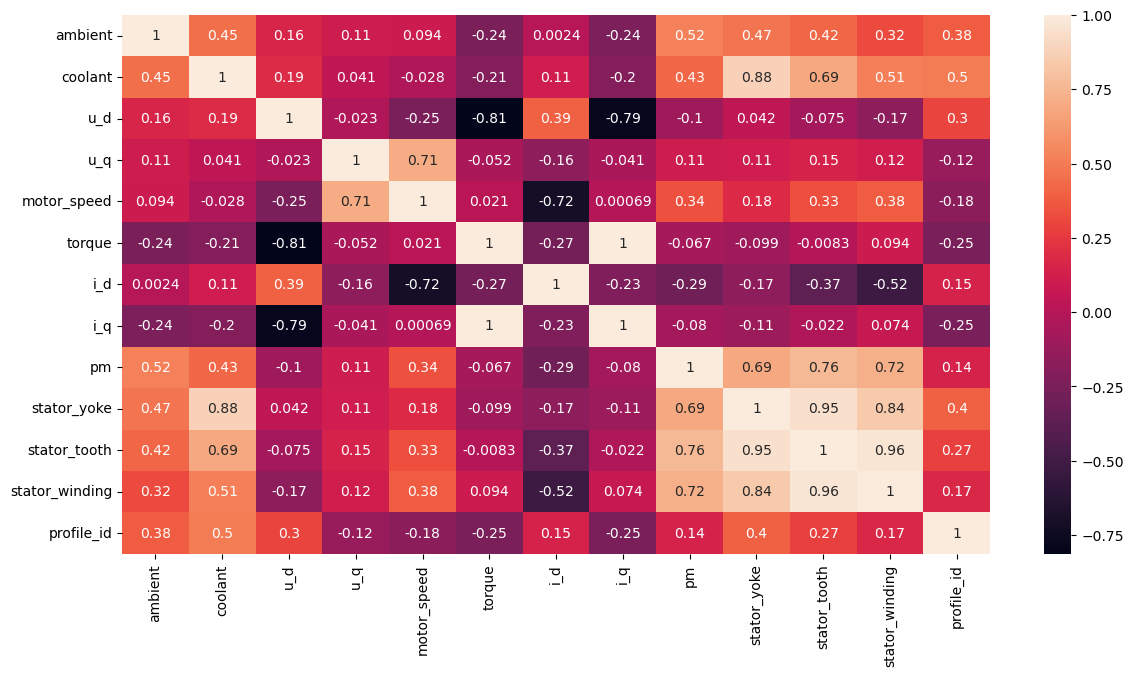

In [9]:
plt.figure(figsize=(14,7))
sns.heatmap(df.corr(),annot=True);

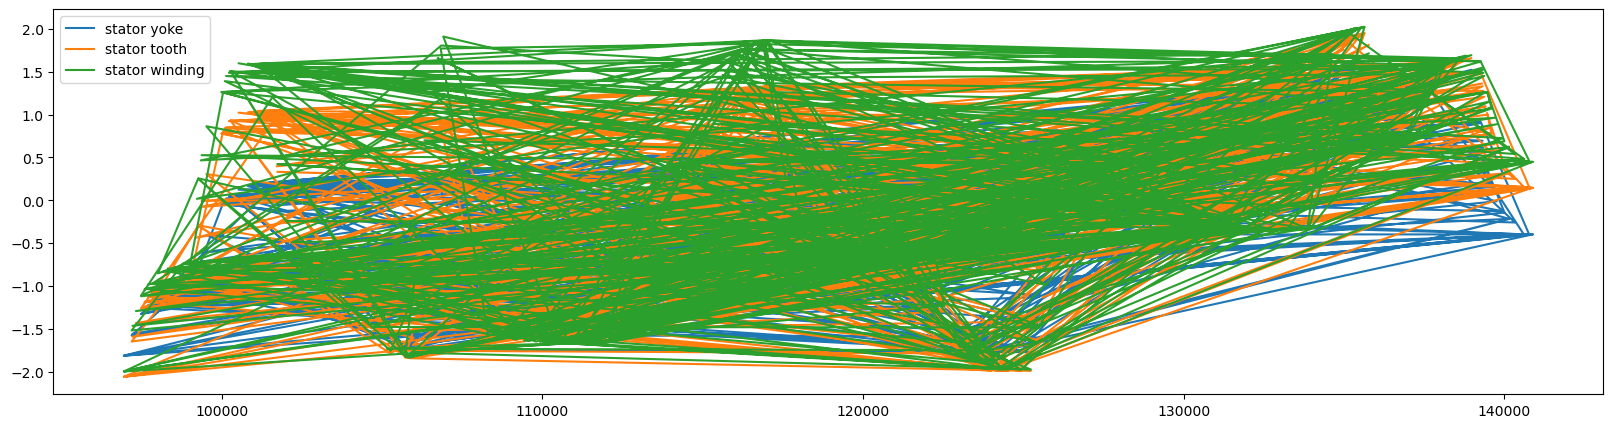

In [10]:
plt.figure(figsize=(20,5))
df[df['profile_id'] == 20]['stator_yoke'].plot(label = 'stator yoke')
df[df['profile_id'] == 20]['stator_tooth'].plot(label = 'stator tooth')
df[df['profile_id'] == 20]['stator_winding'].plot(label = 'stator winding')
plt.legend();

In [11]:
df.drop('profile_id',axis = 1,inplace=True)
df_test.drop('profile_id',axis = 1,inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9393 entries, 612561 to 554969
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ambient         9393 non-null   float64
 1   coolant         9393 non-null   float64
 2   u_d             9393 non-null   float64
 3   u_q             9393 non-null   float64
 4   motor_speed     9393 non-null   float64
 5   torque          9393 non-null   float64
 6   i_d             9393 non-null   float64
 7   i_q             9393 non-null   float64
 8   pm              9393 non-null   float64
 9   stator_yoke     9393 non-null   float64
 10  stator_tooth    9393 non-null   float64
 11  stator_winding  9393 non-null   float64
dtypes: float64(12)
memory usage: 954.0 KB


In [13]:
df.describe()

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding
count,9393.000000,9393.000000,9393.000000,9393.000000,9393.000000,9393.000000,9393.000000,9393.000000,9393.000000,9393.000000,9393.000000,9393.000000
mean,-0.005419,0.018291,-0.037387,0.020975,0.015550,0.037222,-0.008937,0.037193,0.015946,0.023886,0.024380,0.022380
std,0.996899,1.018579,0.991083,0.997295,0.996882,0.993013,0.996990,0.993764,1.001649,1.008883,1.001108,0.996550
min,-3.460883,-1.266658,-1.653532,-1.837648,-1.322968,-3.290890,-3.209635,-3.289023,-2.622470,-1.832417,-2.061667,-2.017035
25%,-0.612689,-1.039840,-0.886495,-0.850219,-0.951870,-0.263198,-0.760161,-0.250640,-0.652032,-0.735203,-0.733115,-0.689259
50%,0.257773,-0.144490,0.201675,-0.084923,-0.140243,-0.119869,0.188985,-0.091443,0.118698,-0.044064,0.029442,0.017694
75%,0.685145,0.772196,0.353879,0.871073,0.873728,0.582889,1.006841,0.552947,0.699424,0.744879,0.795408,0.756040
max,2.635303,2.288454,2.273277,1.770441,2.024135,3.015089,1.060260,2.914170,2.916775,2.439721,2.326356,2.531605


In [14]:
from sklearn.preprocessing import MinMaxScaler
X = df.drop(['pm','stator_yoke','stator_tooth','stator_winding','torque'],axis = 1)
X_df_test = df_test.drop(['pm','stator_yoke','stator_tooth','stator_winding','torque'],axis = 1)
X

,ambient,coolant,u_d,u_q,motor_speed,i_d,i_q
612561,-0.596274,-0.646212,0.315297,-1.251501,-1.222434,1.029138,-0.245723
914552,0.161923,2.225876,0.159851,0.973679,0.057100,0.824405,-0.173798
412269,0.496488,-0.818993,-1.389378,0.270800,-0.149061,-0.261782,1.742835
29387,0.394445,-1.066668,0.314347,-0.713527,-0.951881,1.029119,-0.245726
924310,0.504407,1.180633,0.207853,0.040991,-0.552683,0.988040,-0.091761
...,...,...,...,...,...,...,...
749562,1.433996,0.847724,0.298595,-1.308691,-1.222394,1.029146,-0.245709
90329,-0.992094,-1.092259,0.327661,-1.208762,-1.194644,0.865302,-0.049270
132130,0.687354,0.986072,0.330505,-1.129804,-1.141302,1.029193,-0.245751
532939,0.691700,0.330382,-0.537506,1.463667,0.445751,0.398121,0.283469


In [15]:
df.isnull().sum()

ambient           0
coolant           0
u_d               0
u_q               0
motor_speed       0
torque            0
i_d               0
i_q               0
pm                0
stator_yoke       0
stator_tooth      0
stator_winding    0
dtype: int64

In [16]:
mm = MinMaxScaler()
X = mm.fit_transform(X)
X_df_test = mm.fit_transform(X_df_test)
y = df['pm']
y_df_test = df_test['pm']
X = pd.DataFrame(X,columns = ['ambient', 'coolant', 'u_d', 'u_q', 'motor_speed', 'i_d','i_q'])
X_df_test = pd.DataFrame(X_df_test,columns = ['ambient', 'coolant', 'u_d', 'u_q', 'motor_speed', 'i_d','i_q'])
y.reset_index(drop = True,inplace = True)
y_df_test.reset_index(drop = True,inplace = True)

In [17]:
import joblib
joblib.dump(mm,'transform.save')

['transform.save']

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR


In [20]:
lr=LinearRegression()
dr=DecisionTreeRegressor()
rf=RandomForestRegressor()
svm=SVR()

In [21]:
lr.fit(X_train,y_train)

LinearRegression()

In [22]:
dr.fit(X_train,y_train)

DecisionTreeRegressor()

In [23]:
rf.fit(X_train,y_train)

RandomForestRegressor()

In [24]:
svm.fit(X_train,y_train)

SVR()

In [25]:
p1 = lr.predict(X_test)

In [26]:
p2 = dr.predict(X_test)

In [27]:
p3 = rf.predict(X_test)

In [28]:
p4 =svm.predict(X_test)

In [29]:
from sklearn import metrics

In [30]:
print(metrics.r2_score(y_test,p1))
print(metrics.r2_score(y_test,p2))
print(metrics.r2_score(y_test,p3))
print(metrics.r2_score(y_test,p4))

0.47245479769136856
0.7009898347214423
0.842782075721926
0.6329200160809041


In [31]:
from sklearn.metrics import mean_squared_error

In [32]:
print(mean_squared_error(y_test,p1))

0.5429135828778037


In [47]:
joblib.dump(lr,"model.save")

['model.save']

In [33]:
!pip install watson-machine-learning-client --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.9/538.9 kB 51.0 MB/s eta 0:00:00


In [34]:
from ibm_watson_machine_learning import APIClient
wml_credentials = {
    "url": "https://us-south.ml.cloud.ibm.com",
    "apikey": "c17gYs2NdtPBdDe070ZP-yQNswhZo9VNadXSj8W4QsVM"
}
client = APIClient(wml_credentials)

In [35]:
def guid_from_space_name(client, space_name):
    space = client.spaces.get_details()
    #print(space)
    return(next(item for item in space['resources'] if item['entity']["name"] == space_name)['metadata']['id'])

In [37]:
space_uid = guid_from_space_name(client, space_name='newdeployement')
print("Space UID = " + space_uid)

Space UID = 3d104c0b-db75-4449-a19c-e1849e9b7a7f


In [39]:
client.set.default_space(space_uid)

'SUCCESS'

In [40]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [41]:
import sklearn
sklearn.__version__

'1.1.1'

In [42]:
software_spec_uid= client.software_specifications.get_uid_by_name("runtime-22.1-py3.9")
software_spec_uid

'12b83a17-24d8-5082-900f-0ab31fbfd3cb'

In [45]:
model_details = client.repository.store_model(model=rf,
                                              meta_props={client.repository.ModelMetaNames.NAME:"churnmodeling",
                                                          client.repository.ModelMetaNames.TYPE:"scikit-learn_1.0",
                                                          client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid
                                                         },
                                              training_data=X_train,
                                              training_target=y_train)

In [46]:
model_id = client.repository.get_model_id(model_details)
model_id

'd9f223cb-ce66-4332-b8a6-f476f381cebd'

In [47]:
# Deploy
deployment = client.deployments.create(
    artifact_uid=model_id, 
    meta_props={client.deployments.ConfigurationMetaNames.NAME:"churnmodeling", 
    client.deployments.ConfigurationMetaNames.ONLINE: {}
})



#######################################################################################

Synchronous deployment creation for uid: 'd9f223cb-ce66-4332-b8a6-f476f381cebd' started

#######################################################################################


initializing
Note: online_url is deprecated and will be removed in a future release. Use serving_urls instead.

ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='b7c7847c-20a8-473a-b750-23f35949bf33'
------------------------------------------------------------------------------------------------




In [48]:
X_train

,ambient,coolant,u_d,u_q,motor_speed,i_d,i_q
5061,0.443521,0.448769,0.497920,0.158464,0.030037,0.992718,0.490607
551,0.154304,0.069066,0.004690,0.262465,0.676679,0.253366,0.653912
1432,0.402803,0.293017,0.498209,0.277651,0.097284,0.986805,0.494688
9132,0.553259,0.592279,0.783031,0.849857,0.483268,0.883217,0.354504
1056,0.679572,0.927673,0.496911,0.156931,0.030039,0.992713,0.490606
...,...,...,...,...,...,...,...
8981,0.555477,0.189759,0.473221,0.314927,0.110864,0.976862,0.551334
6400,0.682267,0.336204,0.277650,0.902314,0.554967,0.802726,0.572663
9160,0.408148,0.595033,0.714053,0.898530,0.807277,0.630060,0.422864
1688,0.678243,0.591300,0.391816,0.260659,0.094472,0.597380,0.876989


In [49]:
y_train

5061   -0.329246
551     1.100820
1432   -1.817073
9132    0.129494
1056    1.308416
          ...   
8981   -0.587042
6400    0.155185
9160   -0.006121
1688    0.283369
5994    0.002752
Name: pm, Length: 6575, dtype: float64

In [50]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'label_column': 'pm',
  'schemas': {'input': [{'fields': [{'name': 'ambient', 'type': 'float64'},
      {'name': 'coolant', 'type': 'float64'},
      {'name': 'u_d', 'type': 'float64'},
      {'name': 'u_q', 'type': 'float64'},
      {'name': 'motor_speed', 'type': 'float64'},
      {'name': 'i_d', 'type': 'float64'},
      {'name': 'i_q', 'type': 'float64'}],
     'id': '1',
     'type': 'struct'}],
   'output': []},
  'software_spec': {'id': '12b83a17-24d8-5082-900f-0ab31fbfd3cb',
   'name': 'runtime-22.1-py3.9'},
  'training_data_references': [{'id': '1',
    'location': {},
    'schema': {'fields': [{'name': 'ambient', 'type': 'float64'},
      {'name': 'coolant', 'type': 'float64'},
      {'name': 'u_d', 'type': 'float64'},
      {'name': 'u_q', 'type': 'float64'},
      {'name': 'motor_speed', 'type': 'float64'},
      {'name': 'i_d', 'type': 'float64'},
      {'name': 'i_q', 'type': 'float64'}],
     'id': '1',
     'type': 'Da

In [51]:
X_test.iloc[0]

ambient        0.428002
coolant        0.057507
u_d            0.149499
u_q            0.755900
motor_speed    0.393770
i_d            0.854216
i_q            0.702550
Name: 2428, dtype: float64